In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import xarray as xr
import pandas as pd
gg=xr.open_dataset('https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ww3_global/WaveWatch_III_Global_Wave_Model_best.ncd')
sper=gg.sper.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2016-07-15", "2021-06-15")).to_dataframe()
sdir=gg.sdir.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2016-07-15", "2021-06-15")).to_dataframe()
shgt=gg.shgt.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2016-07-15", "2021-06-15")).to_dataframe()


In [ ]:
tper=gg.Tper.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2016-07-15", "2021-06-15")).to_dataframe()
tdir=gg.Tdir.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2016-07-15", "2021-06-15")).to_dataframe()
thgt=gg.Thgt.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2016-07-15", "2021-06-15")).to_dataframe()


In [ ]:
df = pd.concat([sper, sdir.sdir, shgt.shgt, tper.Tper,tdir.Tdir,thgt.Thgt], axis=1)

In [ ]:
df.to_xarray().to_netcdf('www.nc')


In [ ]:
import xarray as xr
import pandas as pd
df=xr.open_dataset('www.nc').to_dataframe()
df['sper']=df['sper'].dt.total_seconds()


In [ ]:
import xarray as xr
df=xr.open_dataset('www.nc').to_dataframe()
 
 
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import dates
from netCDF4 import Dataset as dat


df['sper']=df['sper'].dt.total_seconds()


df.drop('time_run', axis=1, inplace=True)

df=df.interpolate(method='linear', axis=0).bfill()
 
df.reset_index(inplace=True)
df['time2']=df.time
df.set_index('time', inplace=True)
df['time2']=df.time2.astype(str)

cdfi=df

distance= 223

speed = ((9.81 * cdfi['sper']) / (2*np.pi)) * 3.6
arrive = distance / speed
cdfi['t_arrive'] = arrive

arrive/(24)

cdfi['date_arrive']=dates.num2date(dates.datestr2num(cdfi.time2) +arrive/(24))
cdfi['num_date_arrive']=dates.datestr2num(cdfi.time2) +arrive/(24)

cdfi.drop(['lat', 'lon', 'z'], axis=1, inplace=True)






#########boia menor 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file='SIMCOSTA_RJ-3_OCEAN_2016-07-14_2021-06-14.csv'

d=['YY','MM','DD','hh','mm','sec','WVHT']
cdf=pd.read_csv(file,skiprows=13, header=None, names=d)


cdf[cdf.columns[:6]] = cdf[cdf.columns[:6]].astype(str)

cdf['date_1'] = cdf[cdf.columns[:3]].apply( lambda x: '-'.join(x.str.zfill(2)), axis=1 ) 
cdf['date_2'] = cdf[['hh','mm','sec']].apply( lambda x: ':'.join(x.str.zfill(2)), axis=1 ) 
cdf['date'] = cdf[['date_1','date_2']].apply( lambda x: ' '.join(x), axis=1 )

cdf.set_index('date', inplace=True)
cdf.index=pd.to_datetime(cdf.index)

aa=cdfi.index.get_indexer(cdf.index, method='nearest')
cdfi=cdfi.iloc[np.unique(aa)]



cdf.drop(['YY', 'MM', 'DD','hh', 'mm', 'sec', 'date_1', 'date_2'], axis=1, inplace=True)

cdfim=cdf.interpolate(method='linear', axis=0).bfill()
cdfim.reset_index(inplace=True)
cdfim['date']=cdfim.date.astype(str)
cdfim['time_menor']=dates.datestr2num(cdfim['date'])


from scipy.interpolate import interp1d

f=interp1d(cdfim['time_menor'], cdfim['WVHT'], fill_value='extrapolate')
f(cdfi['num_date_arrive'])

cdfi['menor_height']=f(cdfi['num_date_arrive'])


cdfi.where(cdfi.num_date_arrive<=cdfim.time_menor.max(), inplace=True)
cdfi.where(cdfi.num_date_arrive>=cdfim.time_menor.min(), inplace=True)
 
cdfi.dropna(inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:9011: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:9011: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
cdfi.shape

(23058, 11)

In [ ]:
cdfi.sdir=weim(cdfi.sdir,21)
cdfi.shgt=weim(cdfi.shgt,21)
cdfi.sper=weim(cdfi.sper,21)
cdfi.Tdir=weim(cdfi.Tdir,21)
cdfi.Thgt=weim(cdfi.Thgt,21)
cdfi.Tper=weim(cdfi.Tper,21)
cdfi.menor_height=weim(cdfi.menor_height,21)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:

limt=round(cdfi.shape[0]*0.99)


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(cdfi[['sdir', 'shgt', 'sper', 'Tdir', 'Thgt', 'Tper']][0:limt], cdfi['menor_height'][0:limt], test_size=0.00000001, random_state=42)

#xtrain=cdfi[['Tdir', 'Thgt', 'Tper', 'sdir', 'shgt', 'sper']][0:limt].values
#ytrain=cdfi['menor_height'][0:limt].values

#xtest=cdfi[[ 'Tdir', 'Thgt', 'Tper', 'sdir', 'shgt', 'sper']][limt:cdfi.shape[0]].values
#ytest=cdfi['menor_height'][limt:cdfi.shape[0]].values

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import joblib




In [ ]:
xtrain.shape

(22826, 6)

In [ ]:
import xgboost
from xgboost import XGBRegressor

def model_grid_search(X_train, y_train):
    model = XGBRegressor()
    n_estimators  = [7000]
    learning_rate = [0.00001, 0.0001, 0.001, 0.01, 0.1]
    param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
    kfold = KFold(n_splits=12, shuffle=False)
    grid_search = GridSearchCV(model,
                               param_grid,
                               scoring="neg_mean_squared_error",
                               n_jobs=-1,
                               cv=kfold,
                               verbose=3)
    grid_search.fit(X_train, y_train.ravel())
    joblib.dump(grid_search, 'grid_search_all.pkl')
    joblib.dump(grid_search.best_estimator_, 'grid_search_best.pkl')
    return grid_search

model=model_grid_search(xtrain, ytrain)


Fitting 12 folds for each of 5 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 31.7min


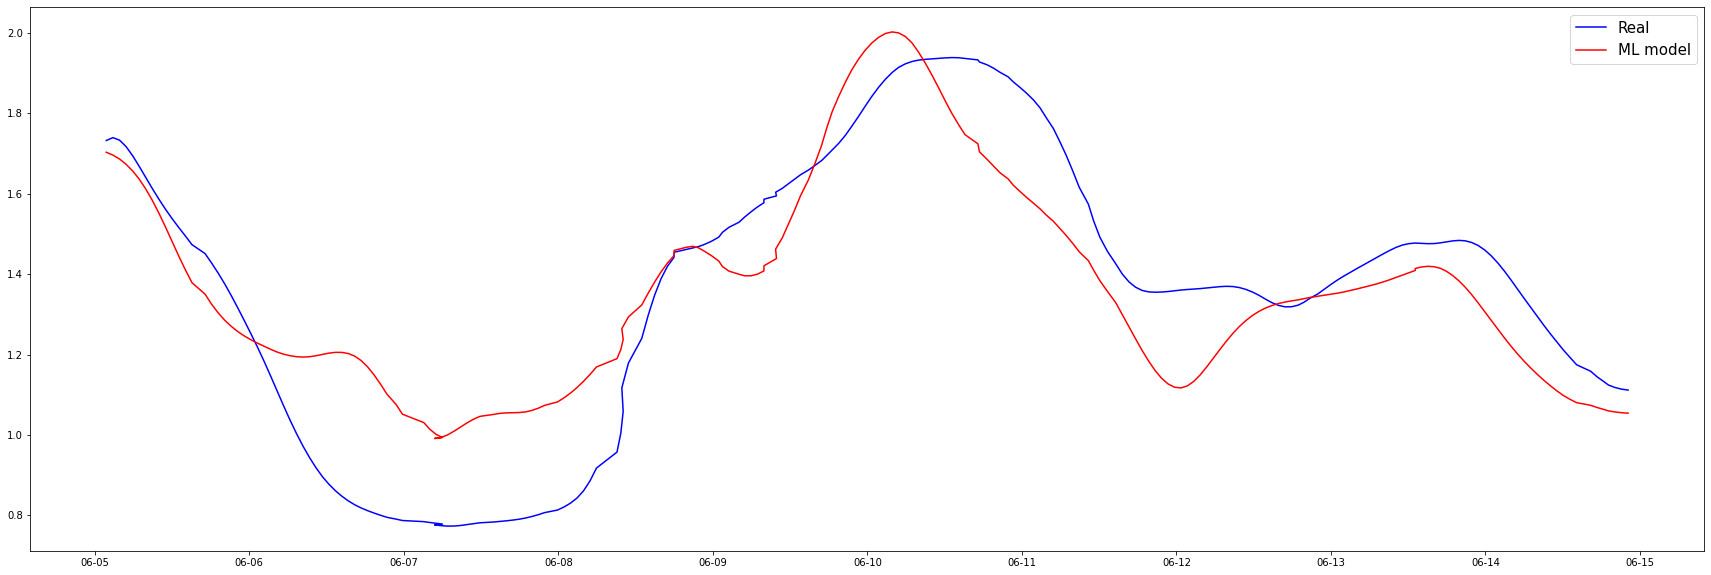

In [ ]:
pp=model.best_estimator_.predict(xtest)
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=[30,10])
ax.plot(cdfi[limt:cdfi.shape[0]].date_arrive, ytest, 'blue', label='Real')
ax.plot(cdfi[limt:cdfi.shape[0]].date_arrive, weim(pp, 21), 'red', label='ML model')
ax.legend(loc='best', prop={'size': 15})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.show()


In [ ]:
cdfi

,sper,sdir,shgt,Tper,Tdir,Thgt,time2,t_arrive,date_arrive,num_date_arrive,menor_height
time,,,,,,,,,,,
2016-07-15 00:00:00,10.690229,11.531679,1.278152,10.649453,203.332926,1.802482,2016-07-15 00:00:00,3.651989,2016-07-15 03:39:07.160720+00:00,736160.152166,0.110731
2016-07-15 01:00:00,10.623018,11.762174,1.264519,10.595117,203.232417,1.797264,2016-07-15 01:00:00,3.688844,2016-07-15 04:41:19.839240+00:00,736160.195369,0.125995
2016-07-15 02:00:00,10.521932,12.198131,1.251726,10.534192,203.103311,1.790865,2016-07-15 02:00:00,3.716118,2016-07-15 05:42:58.026500+00:00,736160.238172,0.146840
2016-07-15 03:00:00,10.378804,12.901712,1.240294,10.465354,202.939409,1.783007,2016-07-15 03:00:00,3.757795,2016-07-15 06:45:28.060280+00:00,736160.281575,0.173163
2016-07-15 04:00:00,10.189451,13.878635,1.230189,10.387572,202.732090,1.773468,2016-07-15 04:00:00,3.844015,2016-07-15 07:50:38.455260+00:00,736160.326834,0.204975
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14 14:00:00,9.455979,198.235461,1.360783,9.559841,192.589902,1.665396,2021-06-14 14:00:00,4.428238,2021-06-14 18:25:41.656800+00:00,737955.767843,1.133551
2021-06-14 15:00:00,9.452268,197.893190,1.353537,9.546992,191.712840,1.652868,2021-06-14 15:00:00,4.149474,2021-06-14 19:08:58.106180+00:00,737955.797895,1.125322
2021-06-14 16:00:00,9.454689,197.562943,1.349957,9.533848,190.904891,1.641702,2021-06-14 16:00:00,4.158056,2021-06-14 20:09:29.001180+00:00,737955.839919,1.119484


In [ ]:
limt=round(cdfi.shape[0]*0.99)

xtrain=cdfi[['sdir', 'shgt', 'sper', 'Tdir', 'Thgt', 'Tper']][0:limt]
ytrain=cdfi['menor_height'][0:limt]

xtest=cdfi[['sdir', 'shgt', 'sper', 'Tdir', 'Thgt', 'Tper']][limt:cdfi.shape[0]]
ytest=cdfi['menor_height'][limt:cdfi.shape[0]]


In [ ]:
model.best_estimator_.predict(xtest)

array([1.73767   , 1.6853042 , 1.597165  , 1.5619359 , 1.5273223 ,
       1.5273223 , 1.4964403 , 1.4519308 , 1.4107217 , 1.4107217 ,
       1.3494586 , 1.2998816 , 1.2997807 , 1.3103205 , 1.3132477 ,
       1.2921004 , 1.2780831 , 1.2681956 , 1.2639148 , 1.2475011 ,
       1.2375205 , 1.2722623 , 1.2239707 , 1.169419  , 1.1647289 ,
       1.1653354 , 1.1393794 , 1.1441324 , 1.1441324 , 1.0753148 ,
       1.0753148 , 1.0753148 , 1.0226437 , 1.0226437 , 1.0297507 ,
       1.0310991 , 1.0164287 , 1.0228236 , 1.0303766 , 1.0396235 ,
       1.0396235 , 1.0337331 , 1.0693506 , 1.0858679 , 0.9781374 ,
       1.0148194 , 0.9524889 , 1.020828  , 1.0150074 , 1.0308993 ,
       1.0502415 , 1.0502415 , 1.0509567 , 1.0583787 , 1.0583787 ,
       1.063667  , 1.063667  , 1.032274  , 1.0380946 , 1.037709  ,
       0.9693699 , 0.9693699 , 0.9693699 , 0.9184052 , 0.9139745 ,
       0.90601426, 0.92638445, 0.98680735, 0.9870485 , 0.98143685,
       1.0570164 , 1.0570164 , 1.0780697 , 1.0893176 , 1.08550

In [ ]:
def weim(x, N, kind='hann', badflag=-9999, beta=14):
	"""
	Usage
	-----
	xs = weim(x, N, kind='hann', badflag=-9999, beta=14)

	Description
	-----------
	Calculates the smoothed array 'xs' from the original array 'x' using the specified
	window of type 'kind' and size 'N'. 'N' must be an odd number.

	Parameters
	----------
	x       : 1D array
	        Array to be smoothed.

	N       : integer
	        Window size. Must be odd.

	kind    : string, optional
	        One of the window types available in the numpy module:

	        hann (default) : Gaussian-like. The weight decreases toward the ends. Its end-points are zeroed.
	        hamming        : Similar to the hann window. Its end-points are not zeroed, therefore it is
	                         discontinuous at the edges, and may produce undesired artifacts.
	        blackman       : Similar to the hann and hamming windows, with sharper ends.
	        bartlett       : Triangular-like. Its end-points are zeroed.
	        kaiser         : Flexible shape. Takes the optional parameter "beta" as a shape parameter.
	                         For beta=0, the window is rectangular. As beta increases, the window gets narrower.

	        Refer to the numpy functions for details about each window type.

	badflag : float, optional
	        The bad data flag. Elements of the input array 'A' holding this value are ignored.

	beta    : float, optional
	        Shape parameter for the kaiser window. For windows other than the kaiser window,
	        this parameter does nothing.

	Returns
	-------
	xs      : 1D array
	        The smoothed array.

	---------------------------------------
	André Palóczy Filho (paloczy@gmail.com)
	June 2012
	==============================================================================================================
	"""
	###########################################
	### Checking window type and dimensions ###
	###########################################
	kinds = ['hann', 'hamming', 'blackman', 'bartlett', 'kaiser']
	if ( kind not in kinds ):
		raise ValueError('Invalid window type requested: %s'%kind)

	if np.mod(N,2) == 0:
		raise ValueError('Window size must be odd')

	###########################
	### Creating the window ###
	###########################
	if ( kind == 'kaiser' ): # If the window kind is kaiser (beta is required).
		wstr = 'np.kaiser(N, beta)'
	else: # If the window kind is hann, hamming, blackman or bartlett (beta is not required).
		if kind == 'hann':
			kind = 'hanning'

	wstr = 'np.' + kind + '(N)'
	w = eval(wstr)

	x = np.asarray(x).flatten()
	Fnan = np.isnan(x).flatten()

	ln = int((N-1)/2)
	lx = x.size
	lf = lx - ln
	xs = np.nan*np.ones(lx)

	# Eliminating bad data from mean computation.
	fbad=x==badflag
	x[fbad] = np.nan

	for i in range(lx):
		if i <= ln:
			xx = x[:ln+i+1]
			ww = w[ln-i:]
		elif i >= lf:
			xx = x[i-ln:]
			ww = w[:lf-i-1]
		else:
			xx = x[i-ln:i+ln+1]
			ww = w.copy()

		f = ~np.isnan(xx) # Counting only NON-NaNs, both in the input array and in the window points.
		xx = xx[f]
		ww = ww[f]

		if f.sum() == 0: # Thou shalt not divide by zero.
			xs[i] = x[i]
		else:
			xs[i] = np.sum(xx*ww)/np.sum(ww)

		xs[Fnan] = np.nan # Assigning NaN to the positions holding NaNs in the input array.

	return xs


In [ ]:
import joblib
model.joblib.load()

In [ ]:
import xarray as xr
import pandas as pd
gg=xr.open_dataset('https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ww3_global/WaveWatch_III_Global_Wave_Model_best.ncd')
sper=gg.sper.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2021-06-01", "2021-06-20")).to_dataframe()
sdir=gg.sdir.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2021-06-01", "2021-06-20")).to_dataframe()
shgt=gg.shgt.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2021-06-01", "2021-06-20")).to_dataframe()
tper=gg.Tper.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2021-06-01", "2021-06-20")).to_dataframe()
tdir=gg.Tdir.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2021-06-01", "2021-06-20")).to_dataframe()
thgt=gg.Thgt.sel(lon=317, method='nearest', lat=-25).sel(time=slice("2021-06-01", "2021-06-20")).to_dataframe()
df = pd.concat([sper, sdir.sdir, shgt.shgt, tper.Tper,tdir.Tdir,thgt.Thgt], axis=1)

In [ ]:
from matplotlib import dates
import numpy as np 
df['sper']=df['sper'].dt.total_seconds()


df.drop('time_run', axis=1, inplace=True)

df=df.interpolate(method='linear', axis=0).bfill()
 
df.reset_index(inplace=True)
df['time2']=df.time
df.set_index('time', inplace=True)
df['time2']=df.time2.astype(str)

cdfi=df

distance= 223

speed = ((9.81 * cdfi['sper']) / (2*np.pi)) * 3.6
arrive = distance / speed
cdfi['t_arrive'] = arrive

arrive/(24)

cdfi['date_arrive']=dates.num2date(dates.datestr2num(cdfi.time2) +arrive/(24))
cdfi['num_date_arrive']=dates.datestr2num(cdfi.time2) +arrive/(24)

cdfi.drop(['lat', 'lon', 'z'], axis=1, inplace=True)






#########boia menor 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file='SIMCOSTA_RJ-3_OCEAN_2021-06-01_2021-06-18.csv'

d=['YY','MM','DD','hh','mm','sec','WVHT']
cdf=pd.read_csv(file,skiprows=13, header=None, names=d)


cdf[cdf.columns[:6]] = cdf[cdf.columns[:6]].astype(str)

cdf['date_1'] = cdf[cdf.columns[:3]].apply( lambda x: '-'.join(x.str.zfill(2)), axis=1 ) 
cdf['date_2'] = cdf[['hh','mm','sec']].apply( lambda x: ':'.join(x.str.zfill(2)), axis=1 ) 
cdf['date'] = cdf[['date_1','date_2']].apply( lambda x: ' '.join(x), axis=1 )

cdf.set_index('date', inplace=True)
cdf.index=pd.to_datetime(cdf.index)

aa=cdfi.index.get_indexer(cdf.index, method='nearest')
cdfi=cdfi.iloc[np.unique(aa)]



cdf.drop(['YY', 'MM', 'DD','hh', 'mm', 'sec', 'date_1', 'date_2'], axis=1, inplace=True)

cdfim=cdf.interpolate(method='linear', axis=0).bfill()
cdfim.reset_index(inplace=True)
cdfim['date']=cdfim.date.astype(str)
cdfim['time_menor']=dates.datestr2num(cdfim['date'])


from scipy.interpolate import interp1d

f=interp1d(cdfim['time_menor'], cdfim['WVHT'], fill_value='extrapolate')
f(cdfi['num_date_arrive'])

cdfi['menor_height']=f(cdfi['num_date_arrive'])


cdfi.where(cdfi.num_date_arrive<=cdfim.time_menor.max(), inplace=True)
cdfi.where(cdfi.num_date_arrive>=cdfim.time_menor.min(), inplace=True)
 
cdfi.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:9011: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:9011: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

[21:13:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


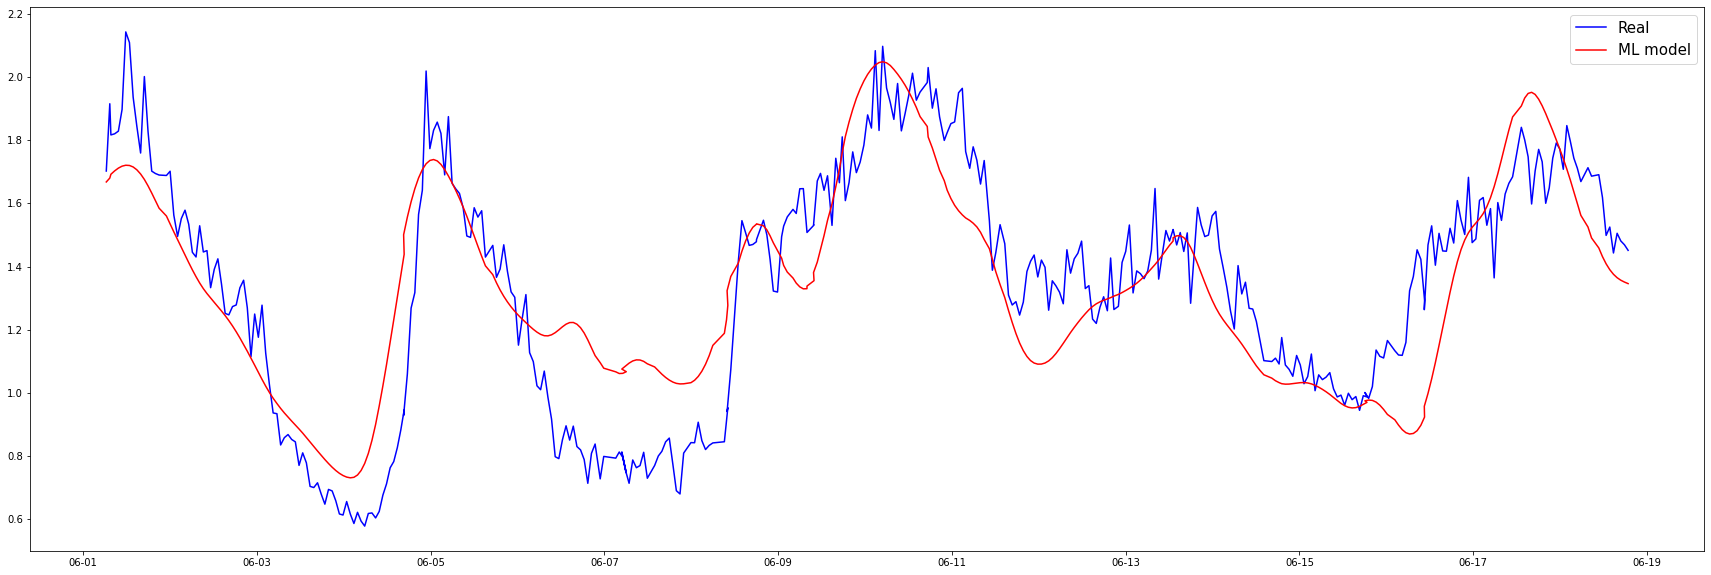

In [ ]:
import xgboost
from xgboost import XGBRegressor
model=joblib.load('grid_search_best.pkl')
xtest=cdfi[['sdir', 'shgt', 'sper', 'Tdir', 'Thgt', 'Tper']]
ytest=cdfi['menor_height']
pp=model.predict(xtest)
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=[30,10])
ax.plot(cdfi.date_arrive, ytest, 'blue', label='Real')
ax.plot(cdfi.date_arrive, weim(pp, 21), 'red', label='ML model')
ax.legend(loc='best', prop={'size': 15})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.show()

In [ ]:
model.fit

<bound method XGBModel.fit of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan, n_estimators=7000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>

In [ ]:
###KERAS

In [ ]:
cdfi.sdir=weim(cdfi.sdir,21)
cdfi.shgt=weim(cdfi.shgt,21)
cdfi.sper=weim(cdfi.sper,21)
cdfi.Tdir=weim(cdfi.Tdir,21)
cdfi.Thgt=weim(cdfi.Thgt,21)
cdfi.Tper=weim(cdfi.Tper,21)
cdfi.menor_height=weim(cdfi.menor_height,21)

limt=round(cdfi.shape[0]*0.99)


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(cdfi[['sdir', 'shgt', 'sper', 'Tdir', 'Thgt', 'Tper']][0:limt], cdfi['menor_height'][0:limt], test_size=1, random_state=42)

#xtrain=cdfi[['Tdir', 'Thgt', 'Tper', 'sdir', 'shgt', 'sper']][0:limt].values
#ytrain=cdfi['menor_height'][0:limt].values

#xtest=cdfi[[ 'Tdir', 'Thgt', 'Tper', 'sdir', 'shgt', 'sper']][limt:cdfi.shape[0]].values
#ytest=cdfi['menor_height'][limt:cdfi.shape[0]].values

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import joblib


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import Dropout
from keras.layers import Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
scaler = MinMaxScaler(feature_range=(0, 1))
scalery = MinMaxScaler(feature_range=(0, 1))
scaled=scaler.fit(xtrain.values)
xtrain=scaled.transform(xtrain.values)
xtest=scaled.transform(xtest.values)
scaledy=scalery.fit(ytrain.values.reshape(-1,1))
ytrain=scaledy.transform(ytrain.values.reshape(-1,1))
ytest=scaledy.transform(ytest.values.reshape(-1,1))


In [ ]:
xtrain=xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest=xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [ ]:
##ficou droga
model.add(Dense(128, input_shape=(xtrain.shape[1], 1), activation='relu'))
# Dropout of 20% of the neurons and activation layer.
model.add(Dropout(.2))
model.add(Activation("linear"))
# Hidden layer j with 64 neurons plus activation layer.
model.add(Dense(64, activation='relu'))
model.add(Activation("linear"))
# Hidden layer k with 64 neurons.
model.add(Dense(64, activation='relu'))
model.add(Flatten())
# Output Layer.
model.add(Dense(1))
model.compile(loss='mse', optimizer=sgd, metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
#model.fit(xtrain, ytrain, nb_epoch=100000, batch_size=100, validation_data=(xtest, ytest), verbose=2, callbacks=[es])
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10000000, batch_size=100, verbose=2, callbacks=[es])
 


In [ ]:
#mae=0.855
sgd = keras.optimizers.SGD(learning_rate=0.0001);
 
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(xtrain.shape[1], 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
#model.compile(loss="mse", optimizer="adam",metrics=['accuracy'])
model.compile(loss="mse", optimizer=Adam(learning_rate=1e-4, decay=1e-4 / 200))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
 
# Fit the model
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=5000, batch_size=100, verbose=2, callbacks=[es])


Epoch 1/5000
229/229 - 1s - loss: 0.0117 - val_loss: 0.0059
Epoch 2/5000
229/229 - 0s - loss: 0.0051 - val_loss: 0.0012
Epoch 3/5000
229/229 - 0s - loss: 0.0045 - val_loss: 7.2400e-04
Epoch 4/5000
229/229 - 0s - loss: 0.0043 - val_loss: 0.0015
Epoch 5/5000
229/229 - 0s - loss: 0.0042 - val_loss: 0.0011
Epoch 6/5000
229/229 - 0s - loss: 0.0041 - val_loss: 0.0013
Epoch 7/5000
229/229 - 0s - loss: 0.0040 - val_loss: 8.4774e-04
Epoch 8/5000
229/229 - 0s - loss: 0.0039 - val_loss: 8.2622e-04
Epoch 9/5000
229/229 - 0s - loss: 0.0039 - val_loss: 0.0011
Epoch 10/5000
229/229 - 0s - loss: 0.0038 - val_loss: 6.4977e-04
Epoch 11/5000
229/229 - 0s - loss: 0.0037 - val_loss: 8.0374e-04
Epoch 12/5000
229/229 - 0s - loss: 0.0037 - val_loss: 8.6283e-04
Epoch 13/5000
229/229 - 0s - loss: 0.0036 - val_loss: 7.5278e-04
Epoch 14/5000
229/229 - 0s - loss: 0.0036 - val_loss: 5.4214e-04
Epoch 15/5000
229/229 - 0s - loss: 0.0035 - val_loss: 9.8236e-04
Epoch 16/5000
229/229 - 0s - loss: 0.0035 - val_loss: 5.46

In [ ]:

#sgd = keras.optimizers.SGD(lr=0.0001);

model = Sequential()
model.add(Dense(128, activation="relu", input_dim=xtrain.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))
 
 
# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-4, decay=1e-4 / 200))
#model.compile(loss='mean_squared_error', optimizer=sgd)
 
# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
 
# Fit the model
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=5000, batch_size=100, verbose=2, callbacks=[es])


Epoch 1/5000
229/229 - 1s - loss: 0.0359 - val_loss: 0.0186
Epoch 2/5000
229/229 - 0s - loss: 0.0086 - val_loss: 0.0077
Epoch 3/5000
229/229 - 0s - loss: 0.0064 - val_loss: 0.0019
Epoch 4/5000
229/229 - 0s - loss: 0.0050 - val_loss: 5.4287e-04
Epoch 5/5000
229/229 - 0s - loss: 0.0046 - val_loss: 2.3694e-04
Epoch 6/5000
229/229 - 0s - loss: 0.0043 - val_loss: 2.5661e-04
Epoch 7/5000
229/229 - 0s - loss: 0.0041 - val_loss: 1.8628e-04
Epoch 8/5000
229/229 - 0s - loss: 0.0040 - val_loss: 7.4054e-05
Epoch 9/5000
229/229 - 0s - loss: 0.0038 - val_loss: 9.4451e-05
Epoch 10/5000
229/229 - 0s - loss: 0.0037 - val_loss: 1.6301e-04
Epoch 11/5000
229/229 - 0s - loss: 0.0037 - val_loss: 1.9500e-04
Epoch 12/5000
229/229 - 0s - loss: 0.0036 - val_loss: 1.5225e-04
Epoch 13/5000
229/229 - 0s - loss: 0.0035 - val_loss: 1.2092e-04
Epoch 14/5000
229/229 - 0s - loss: 0.0035 - val_loss: 5.3565e-05
Epoch 15/5000
229/229 - 0s - loss: 0.0034 - val_loss: 1.2357e-04
Epoch 16/5000
229/229 - 0s - loss: 0.0034 - va

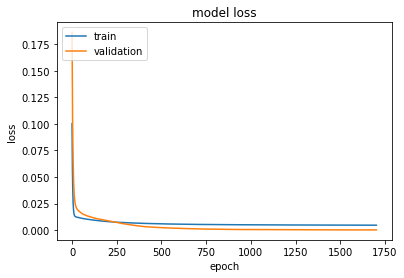

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
limt=round(cdfi.shape[0]*0.99)

xtrain=cdfi[['sdir', 'shgt', 'sper', 'Tdir', 'Thgt', 'Tper']][0:limt]
ytrain=cdfi['menor_height'][0:limt]

xtest=cdfi[['sdir', 'shgt', 'sper', 'Tdir', 'Thgt', 'Tper']][limt:cdfi.shape[0]]
ytest=cdfi['menor_height'][limt:cdfi.shape[0]]
xtrain=scaled.transform(xtrain.values)
xtest=scaled.transform(xtest.values)
scaledy=scalery.fit(ytrain.values.reshape(-1,1))
ytrain=scaledy.transform(ytrain.values.reshape(-1,1))
ytest=scaledy.transform(ytest.values.reshape(-1,1))


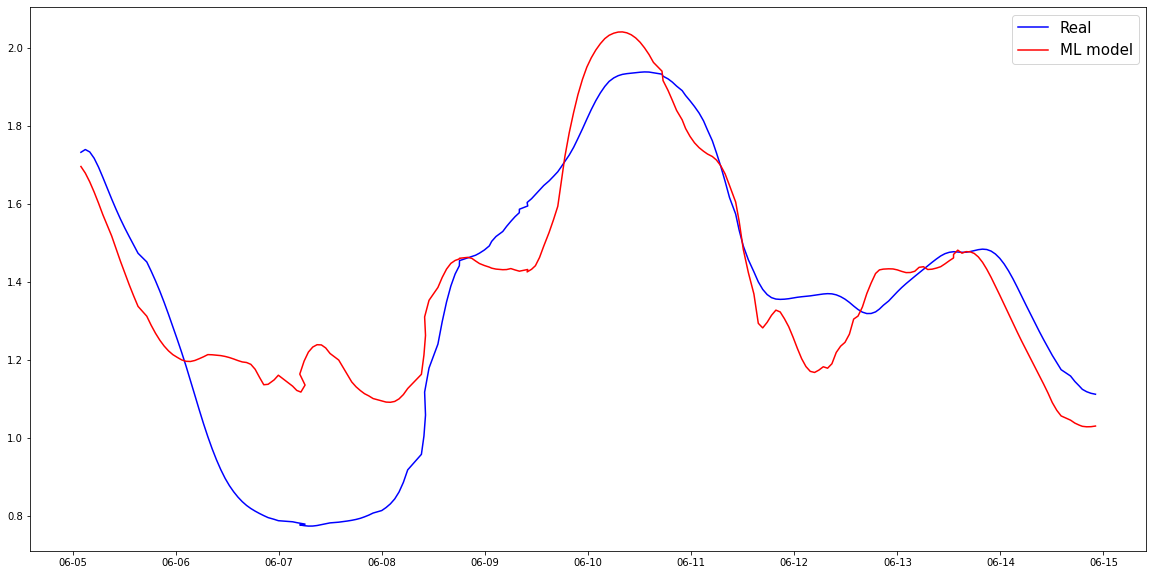

In [ ]:
xtest=xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

pp=scaledy.inverse_transform(model.predict(xtest))
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=[20,10])
ax.plot(cdfi[limt:cdfi.shape[0]].date_arrive, scaledy.inverse_transform(ytest), 'blue', label='Real')
ax.plot(cdfi[limt:cdfi.shape[0]].date_arrive, pp, 'red', label='ML model')
ax.legend(loc='best', prop={'size': 15})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.show()

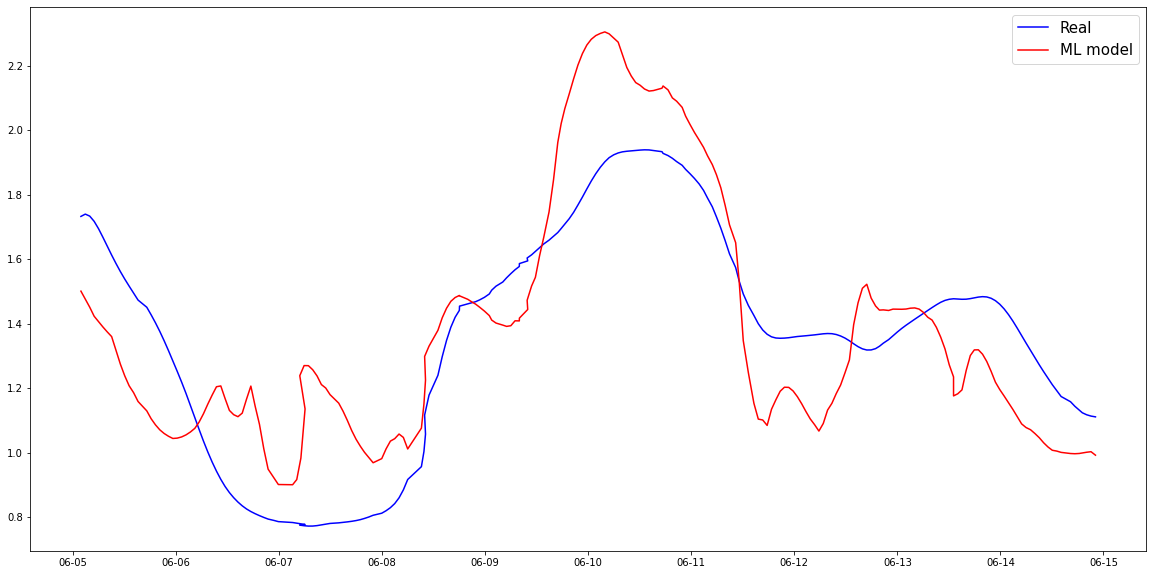

In [ ]:
pp=scaledy.inverse_transform(model.predict(xtest))
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=[20,10])
ax.plot(cdfi[limt:cdfi.shape[0]].date_arrive, scaledy.inverse_transform(ytest), 'blue', label='Real')
ax.plot(cdfi[limt:cdfi.shape[0]].date_arrive, pp, 'red', label='ML model')
ax.legend(loc='best', prop={'size': 15})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.show()



In [ ]:
#forecast

In [ ]:
cdfi.sdir=weim(cdfi.sdir,21)
cdfi.shgt=weim(cdfi.shgt,21)
cdfi.sper=weim(cdfi.sper,21)
cdfi.Tdir=weim(cdfi.Tdir,21)
cdfi.Thgt=weim(cdfi.Thgt,21)
cdfi.Tper=weim(cdfi.Tper,21)
cdfi.menor_height=weim(cdfi.menor_height,21)
xtest=cdfi[['sdir', 'shgt', 'sper', 'Tdir', 'Thgt', 'Tper']]
ytest=cdfi['menor_height']
xtest=scaled.transform(xtest.values)
ytest=scaledy.transform(ytest.values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


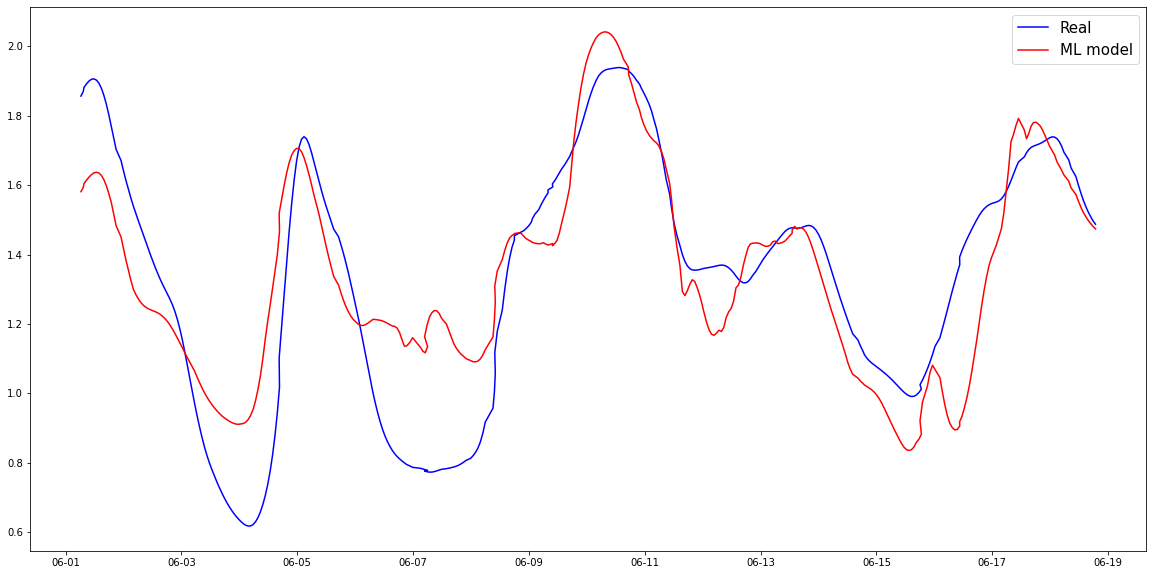

In [ ]:
xtest=xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

pp=scaledy.inverse_transform(model.predict(xtest))
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=[20,10])
ax.plot(cdfi.date_arrive, scaledy.inverse_transform(ytest), 'blue', label='Real')
ax.plot(cdfi.date_arrive, pp, 'red', label='ML model')
ax.legend(loc='best', prop={'size': 15})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.show()